#### This notebook analyses the temperature diagnostics (e.g., global average temperature, SST) in the sinusoidal forcing experiments.

In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.optimize import curve_fit
from xhistogram.xarray import histogram

from dask.distributed import Client
import cftime

%matplotlib inline

In [20]:
client = Client(n_workers=8)
display(client)

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/46503/status,
Dashboard: /proxy/46503/status,Workers: 8
Total threads: 8,Total memory: 90.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45505,Workers: 8
Dashboard: /proxy/46503/status,Total threads: 8
Started: Just now,Total memory: 90.00 GiB
Comm: tcp://10.6.122.10:40607,Total threads: 1
Dashboard: /proxy/34767/status,Memory: 11.25 GiB
Nanny: tcp://127.0.0.1:33609,


In [3]:
### Generate new session

db = '/scratch/e14/mp2135/access-om2/archive/databases/1deg_jra55_ryf_experiments_abrupt_spinup500.db'
session = cc.database.create_session(db)

cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_cont,24764
1,1deg_jra55_ryf_rcp45warm_x1_spinup500,42426
2,1deg_jra55_ryf_rcp45cool_x1_spinup500,42426
3,1deg_jra55_ryf_warm_0sat_8dwlw_spinup500,21206
4,1deg_jra55_ryf_warm_1.5sat_0dwlw_spinup500,21206
5,1deg_jra55_ryf_RCPwarm_humid_x1,42426
6,1deg_jra55_ryf_RCPwarm_humid_x2,42207
7,1deg_jra55_ryf_RCPcool_humid_x1,3820
8,1deg_jra55_ryf_RCPcool_humid_x2,4010
9,1deg_jra55_ryf_wcwc_step_test1,2108


### Global average temperature

In [4]:
yr_beg = cftime.DatetimeNoLeap(2400, 1, 1, 0, 0, 0, 0)
yr_end = cftime.DatetimeNoLeap(2500, 2, 15, 0, 0, 0, 0)

### NB: Need to remove last snapshot for annual-average purposes
### as well as remove the first 5 snapshots because of the forcing calendar misalignment (see: https://github.com/COSIMA/libaccessom2/issues/69)
### which of course is only applicable to the perturbation experiments, but removing in the control for copmpleteness

expt = '1deg_jra55_ryf_cont'
var = 'temp_global_ave'
frequency = '1 daily'
gat_cont = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

expt = '1deg_jra55_ryf_sinusoid_x1_period7'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period7 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, None)).chunk(chunks='auto')

expt = '1deg_jra55_ryf_sinusoid_x1_period12'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period12 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, None)).chunk(chunks='auto')

expt = '1deg_jra55_ryf_sinusoid_x1_period16'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period16 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, None)).chunk(chunks='auto')

distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 33% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 32% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 31% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [5]:
yr_beg = cftime.DatetimeNoLeap(2400, 1, 7, 0, 0, 0, 0) # because of an annoying leap-year misalignment...
yr_end = cftime.DatetimeNoLeap(2500, 2, 15, 0, 0, 0, 0)

expt = '1deg_jra55_ryf_sinusoid_x1_period2'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period2 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

expt = '1deg_jra55_ryf_sinusoid_x1_period5'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period5 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

expt = '1deg_jra55_ryf_sinusoid_x1_period10'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period10 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

expt = '1deg_jra55_ryf_sinusoid_x1_period20'
var = 'temp_global_ave'
frequency = '1 daily'
gat_period20 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 36% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [6]:
### Load in to memory and flatten

gat_cont = gat_cont.load()[:,0]
gat_period2 = gat_period2.load()[:,0]
gat_period5 = gat_period5.load()[:,0]
gat_period7 = gat_period7.load()[:,0]
gat_period10 = gat_period10.load()[:,0]
gat_period12 = gat_period12.load()[:,0]
gat_period16 = gat_period16.load()[:,0]
gat_period20 = gat_period20.load()[:,0]

distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 38% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 37% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [7]:
### Anomalise 

gat_period2_anom = gat_period2 - gat_cont
gat_period5_anom = gat_period5 - gat_cont
gat_period7_anom = gat_period7 - gat_cont
gat_period10_anom = gat_period10 - gat_cont
gat_period12_anom = gat_period12 - gat_cont
gat_period16_anom = gat_period16 - gat_cont
gat_period20_anom = gat_period20 - gat_cont

Text(0.5, 0, 'Year')

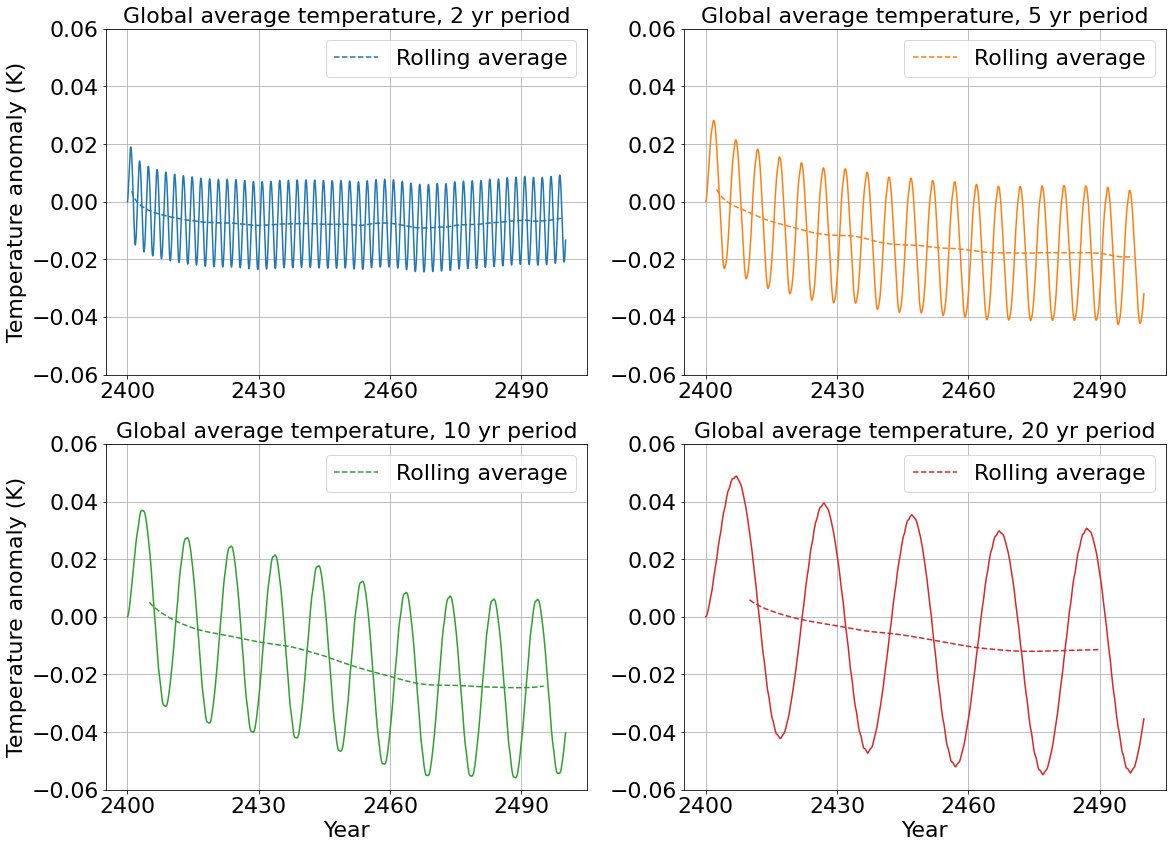

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (19, 14))

colors = ['C0', 'C1', 'C2', 'C3']
ymax = 0.06
ymin = -0.06

def four_sinusoid_plot(anom_to_plot, period, title, color):
    anom_to_plot.plot(ax = axs, color = color)
    (anom_to_plot.rolling(time = 365 * period, center=True).mean()).dropna("time").plot(ax=axs, color=color, linestyle='--', label='Rolling average')
    axs.set_title(title, fontsize=22)
    axs.set_ylabel('', fontsize=20)
    axs.set_xlabel('', fontsize=20)
    axs.tick_params(labelsize=22)
    axs.grid()
    axs.legend(fontsize=22)
    axs.set_ylim(ymin, ymax)

axs = ax[0, 0]
color = colors[0]
four_sinusoid_plot(gat_period2_anom, 2, 'Global average temperature, 2 yr period', color)
axs.set_ylabel('Temperature anomaly (K)', fontsize=22)

axs = ax[0, 1]
color = colors[1]
four_sinusoid_plot(gat_period5_anom, 5, 'Global average temperature, 5 yr period', color)

axs = ax[1, 0]
color = colors[2]
four_sinusoid_plot(gat_period10_anom, 10, 'Global average temperature, 10 yr period', color)
axs.set_xlabel('Year', fontsize=22)
axs.set_ylabel('Temperature anomaly (K)', fontsize=22)

axs = ax[1, 1]
color = colors[3]
four_sinusoid_plot(gat_period20_anom, 20, 'Global average temperature, 20 yr period', color)
axs.set_xlabel('Year', fontsize=22)

# plt.savefig('ch4_GAT_four_sinusoids.jpg', bbox_inches='tight', dpi=100)

### Examining the nonlinearity in frequency 

In [10]:
# def rolling_mean(array_daily, period_yearly):
#     window_size = int(period_yearly * 365)
                      
#     i = 0
#     moving_averages = []
#     while i < len(array_daily) - window_size + 1:
#         this_window = array_daily[i : i + window_size]

#         window_average = float(np.mean(this_window))
#         moving_averages.append(window_average)
#         i += 1
                      
#     return np.array(moving_averages)

# gat_period2_anom_smoothed = rolling_mean(gat_period2 - gat_cont, 2)
# gat_period5_anom_smoothed = rolling_mean(gat_period5 - gat_cont, 5)
# gat_period7_anom_smoothed = rolling_mean(gat_period7 - gat_cont, 7)
# gat_period10_anom_smoothed = rolling_mean(gat_period10 - gat_cont, 10)
# gat_period12_anom_smoothed = rolling_mean(gat_period12 - gat_cont, 12)
# gat_period16_anom_smoothed = rolling_mean(gat_period16 - gat_cont, 16)
# gat_period20_anom_smoothed = rolling_mean(gat_period20 - gat_cont, 20)

# time = np.arange(2400, 2400 + len(gat_period2_anom_smoothed)*1/365, 1/365)

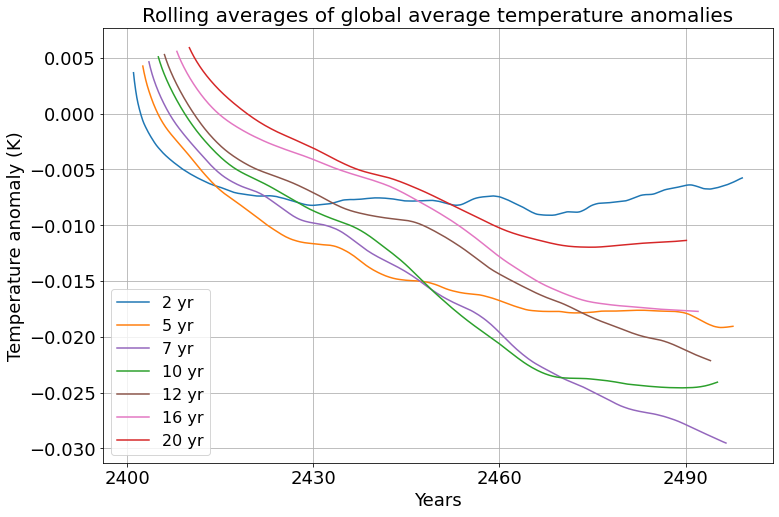

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [30]:
plt.figure(figsize=(12,8))

(gat_period2_anom.rolling(time = 365 * 2, center=True).mean()).dropna("time").plot(label='2 yr', color='C0')
(gat_period5_anom.rolling(time = 365 * 5, center=True).mean()).dropna("time").plot(label='5 yr', color='C1')
(gat_period7_anom.rolling(time = 365 * 7, center=True).mean()).dropna("time").plot(label='7 yr', color='C4')
(gat_period10_anom.rolling(time = 365 * 10, center=True).mean()).dropna("time").plot(label='10 yr', color='C2')
(gat_period12_anom.rolling(time = 365 * 12, center=True).mean()).dropna("time").plot(label='12 yr', color='C5')
(gat_period16_anom.rolling(time = 365 * 16, center=True).mean()).dropna("time").plot(label='16 yr', color='C6')
(gat_period20_anom.rolling(time = 365 * 20, center=True).mean()).dropna("time").plot(label='20 yr', color='C3')


plt.title('Rolling averages of global average temperature anomalies', fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Temperature anomaly (K)', fontsize=18)
plt.tick_params(labelsize=18)
plt.grid()

plt.legend(fontsize=16)
# plt.savefig('ch4_all_sinusoid_rolling_means.jpg', bbox_inches='tight', dpi=100)

Haha cool!!


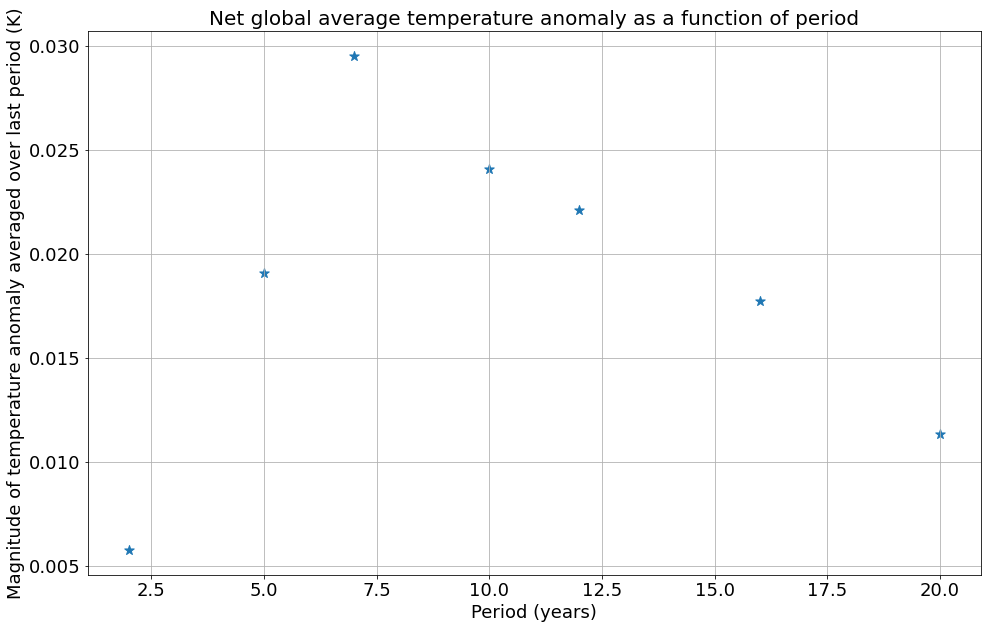

In [28]:
### T_final_distribution

T_final_distribution = np.abs(np.array([gat_period2_anom_smoothed[-1],\
                                gat_period5_anom_smoothed[-1],\
                                gat_period7_anom_smoothed[-1],\
                                gat_period10_anom_smoothed[-1],\
                                gat_period12_anom_smoothed[-1],\
                                gat_period16_anom_smoothed[-1],\
                                gat_period20_anom_smoothed[-1]]))

periods = np.array([2,5,7,10,12,16,20])

plt.figure(figsize=(16,10))
plt.title('Net global average temperature anomaly as a function of period', fontsize=20)
plt.xlabel('Period (years)', fontsize=18)
plt.ylabel('Magnitude of temperature anomaly averaged over last period (K)', fontsize=18)
plt.tick_params(labelsize=18)
plt.grid()

plt.scatter(periods, T_final_distribution, s=100, marker='*')
print('Haha cool!!')
# plt.savefig('ch4_3D_sinusoids_final_temp_anom.jpg')

### Sea surface temperature

In [13]:
yr_beg = cftime.DatetimeNoLeap(2400, 1, 7, 0, 0, 0, 0)
yr_end = cftime.DatetimeNoLeap(2500, 2, 15, 0, 0, 0, 0)

expt = '1deg_jra55_ryf_cont'
var = 'temp_surface_ave'
frequency = '1 daily'
sst_cont = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

### NB: Need to remove last snapshot for annual-average purposes
### as well as remove the first 5 snapshots because of the forcing calendar misalignment (see: https://github.com/COSIMA/libaccessom2/issues/69)
### which of course is only applicable to the perturbation experiments, but removing in the control for copmpleteness

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


In [14]:
expt = '1deg_jra55_ryf_sinusoid_x1_period2'
var = 'temp_surface_ave'
frequency = '1 daily'
sst_period2 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

In [15]:
expt = '1deg_jra55_ryf_sinusoid_x1_period5'
var = 'temp_surface_ave'
frequency = '1 daily'
sst_period5 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

In [16]:
expt = '1deg_jra55_ryf_sinusoid_x1_period10'
var = 'temp_surface_ave'
frequency = '1 daily'
sst_period10 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

In [17]:
expt = '1deg_jra55_ryf_sinusoid_x1_period20'
var = 'temp_surface_ave'
frequency = '1 daily'
sst_period20 = cc.querying.getvar(expt, var, session).sel(time=slice(yr_beg, yr_end)).chunk(chunks='auto')

In [18]:
# Annually average and load in to memory

sst_cont = sst_cont.load()#.groupby('time.year').mean('time').load()
sst_period2 = sst_period2.load()#.groupby('time.year').mean('time').load()
sst_period5 = sst_period5.load()#.groupby('time.year').mean('time').load()
sst_period10 = sst_period10.load()#.groupby('time.year').mean('time').load()
sst_period20 = sst_period20.load()#.groupby('time.year').mean('time').load()

# Flatten

sst_cont = sst_cont[:,0]
sst_period2 = sst_period2[:,0]
sst_period5 = sst_period5[:,0]
sst_period10 = sst_period10[:,0]
sst_period20 = sst_period20[:,0]

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [19]:
# Anomalies

sst_period2_anom = sst_period2 - sst_cont
sst_period5_anom = sst_period5 - sst_cont
sst_period10_anom = sst_period10 - sst_cont
sst_period20_anom = sst_period20 - sst_cont

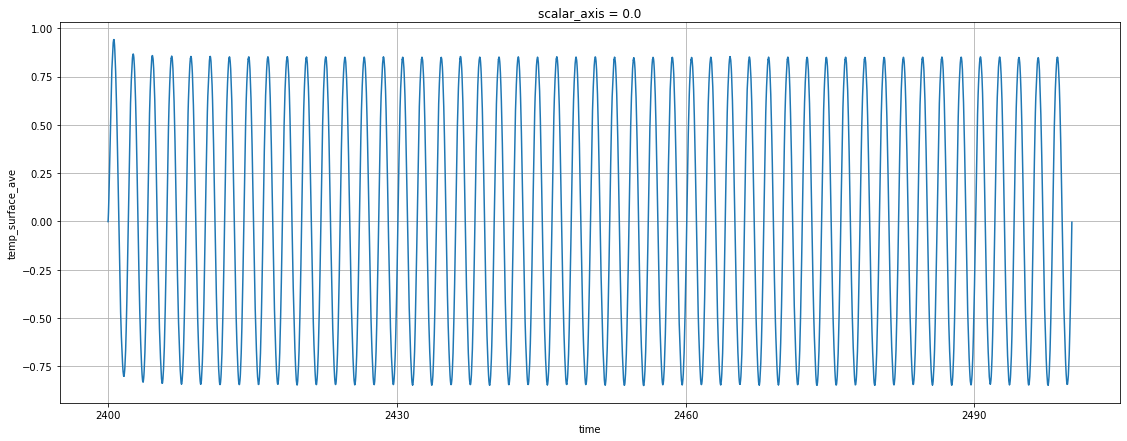

In [20]:
plt.figure(figsize=(19,7))
sst_period2_anom.sel(time=slice(None, yr_end)).plot()
# sst_period5_anom.sel(time=slice(None, yr_end)).plot()
# sst_period10_anom.sel(time=slice(None, yr_end)).plot()
# sst_period20_anom.sel(time=slice(None, yr_end)).plot()
plt.grid()

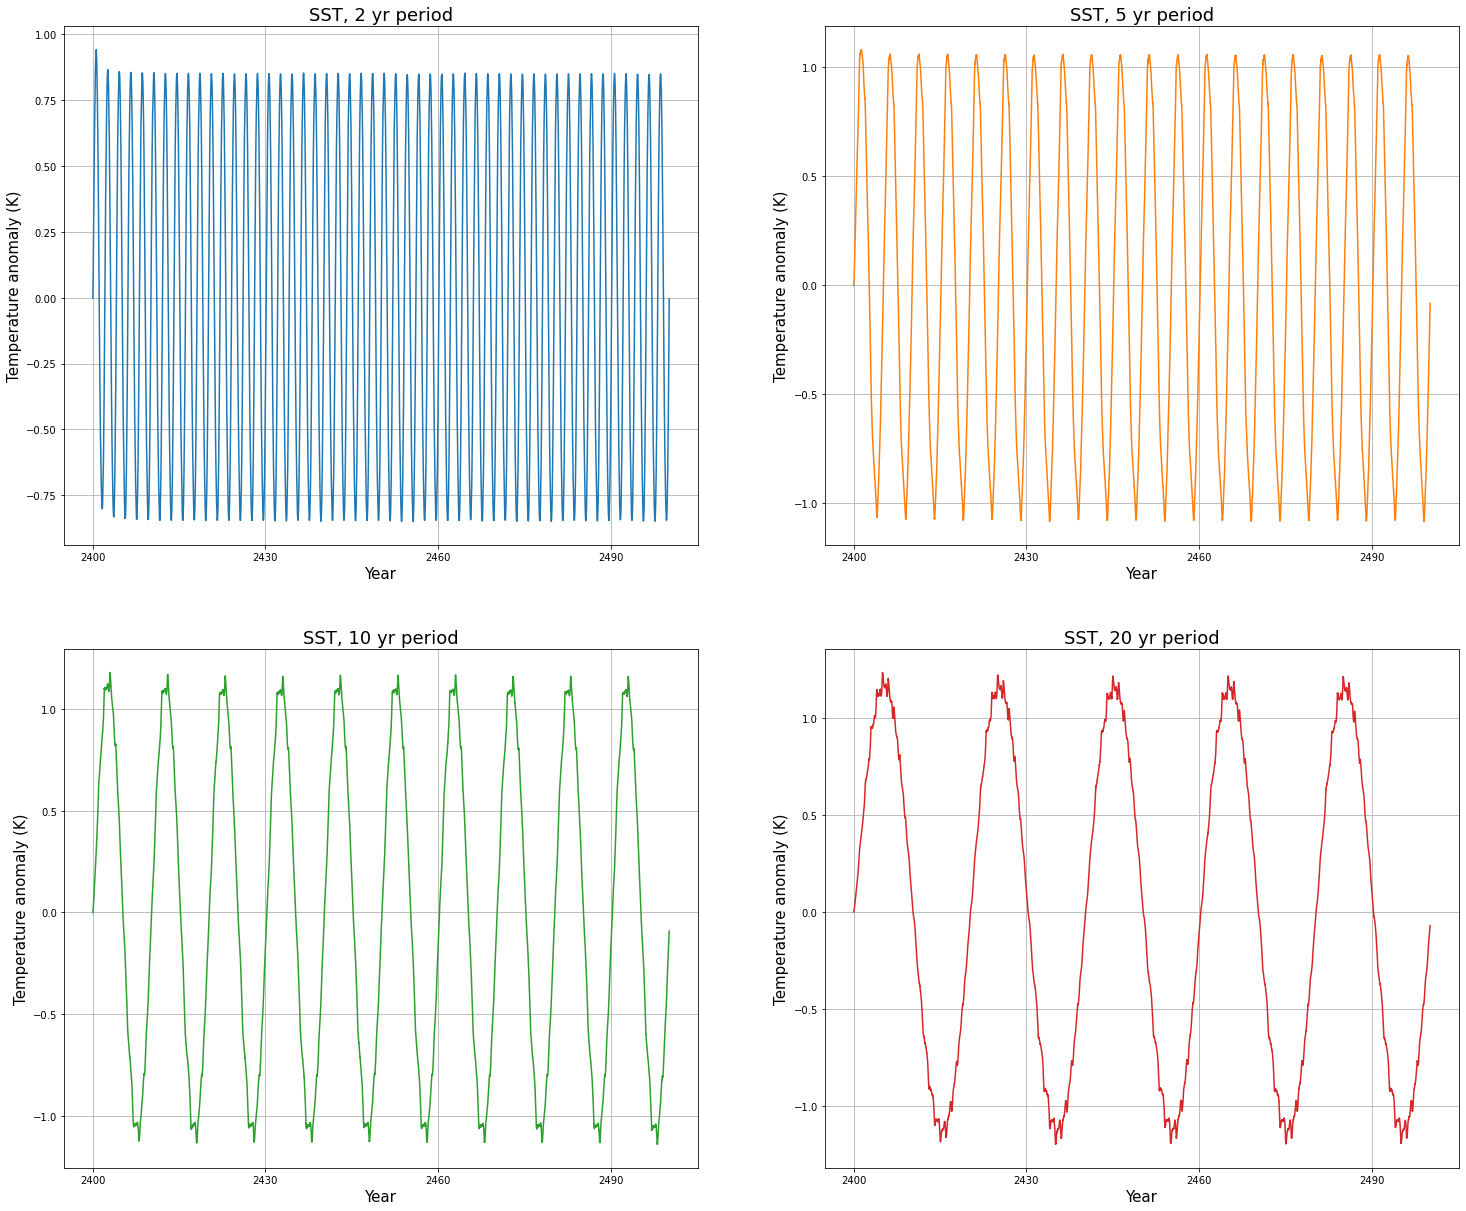

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (25, 21))

axs = ax[0, 0]
sst_period2_anom.plot(ax=axs, color = 'C0')
axs.set_title('SST, 2 yr period', fontsize=18)
axs.set_ylabel('Temperature anomaly (K)', fontsize=15)
axs.set_xlabel('Year', fontsize=15)
axs.grid()

axs = ax[0, 1]
sst_period5_anom.plot(ax=axs, color = 'C1')
axs.set_title('SST, 5 yr period', fontsize=18)
axs.set_ylabel('Temperature anomaly (K)', fontsize=15)
axs.set_xlabel('Year', fontsize=15)
axs.grid()

axs = ax[1, 0]
sst_period10_anom.plot(ax=axs, color = 'C2')
axs.set_title('SST, 10 yr period', fontsize=18)
axs.set_ylabel('Temperature anomaly (K)', fontsize=15)
axs.set_xlabel('Year', fontsize=15)
axs.grid()

axs = ax[1, 1]
sst_period20_anom.plot(ax=axs, color = 'C3')
axs.set_title('SST, 20 yr period', fontsize=18)
axs.set_ylabel('Temperature anomaly (K)', fontsize=15)
axs.set_xlabel('Year', fontsize=15)
axs.grid()

# plt.savefig('sst_sinusoidals.jpg')

### Calculating ocean heat uptake efficiency (OHUE)

Explanation: e.g., (_Raper et al., 2002)_

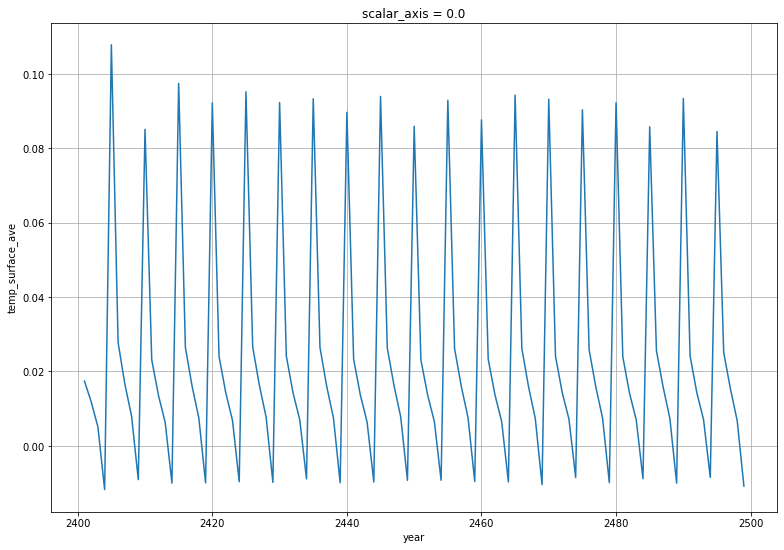

In [194]:
plt.figure(figsize=(13,9))

gat_period10_anom_tendency = np.diff(gat_period10_anom)
# plt.plot(gat_period10_anom_tendency/np.std(gat_period10_anom_tendency))
# plt.plot(sst_period10_anom[1:].values/np.std(sst_period10_anom[1:].values))
gat_period10_ohue = gat_period10_anom_tendency[:] / sst_period10_anom[1:]
gat_period10_ohue.plot()
plt.grid()